In [236]:
import pandas as pd
import numpy as np

In [237]:
df=pd.read_parquet("data.parquet")
df

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28
2022-06-30 15:27:00,0.240875,0.216558,28
2022-06-30 15:28:00,0.242115,0.216794,28


In [238]:
df.head()

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27


In [239]:
df.tail()

,banknifty,nifty,tte
time,,,
2022-06-30 15:26:00,0.240701,0.214758,28
2022-06-30 15:27:00,0.240875,0.216558,28
2022-06-30 15:28:00,0.242115,0.216794,28
2022-06-30 15:29:00,0.243426,0.216455,28
2022-06-30 15:30:00,0.241907,0.216081,28


In [240]:
import matplotlib.pyplot as plt
%matplotlib inline

In [241]:
df.columns

Index(['banknifty', 'nifty', 'tte'], dtype='object')

In [242]:
df.isnull().sum()

banknifty    1500
nifty        2000
tte             0
dtype: int64

The above cell shows us there are some missing values in the Data frame.
To fill the null values we have to understand the trend of the values.

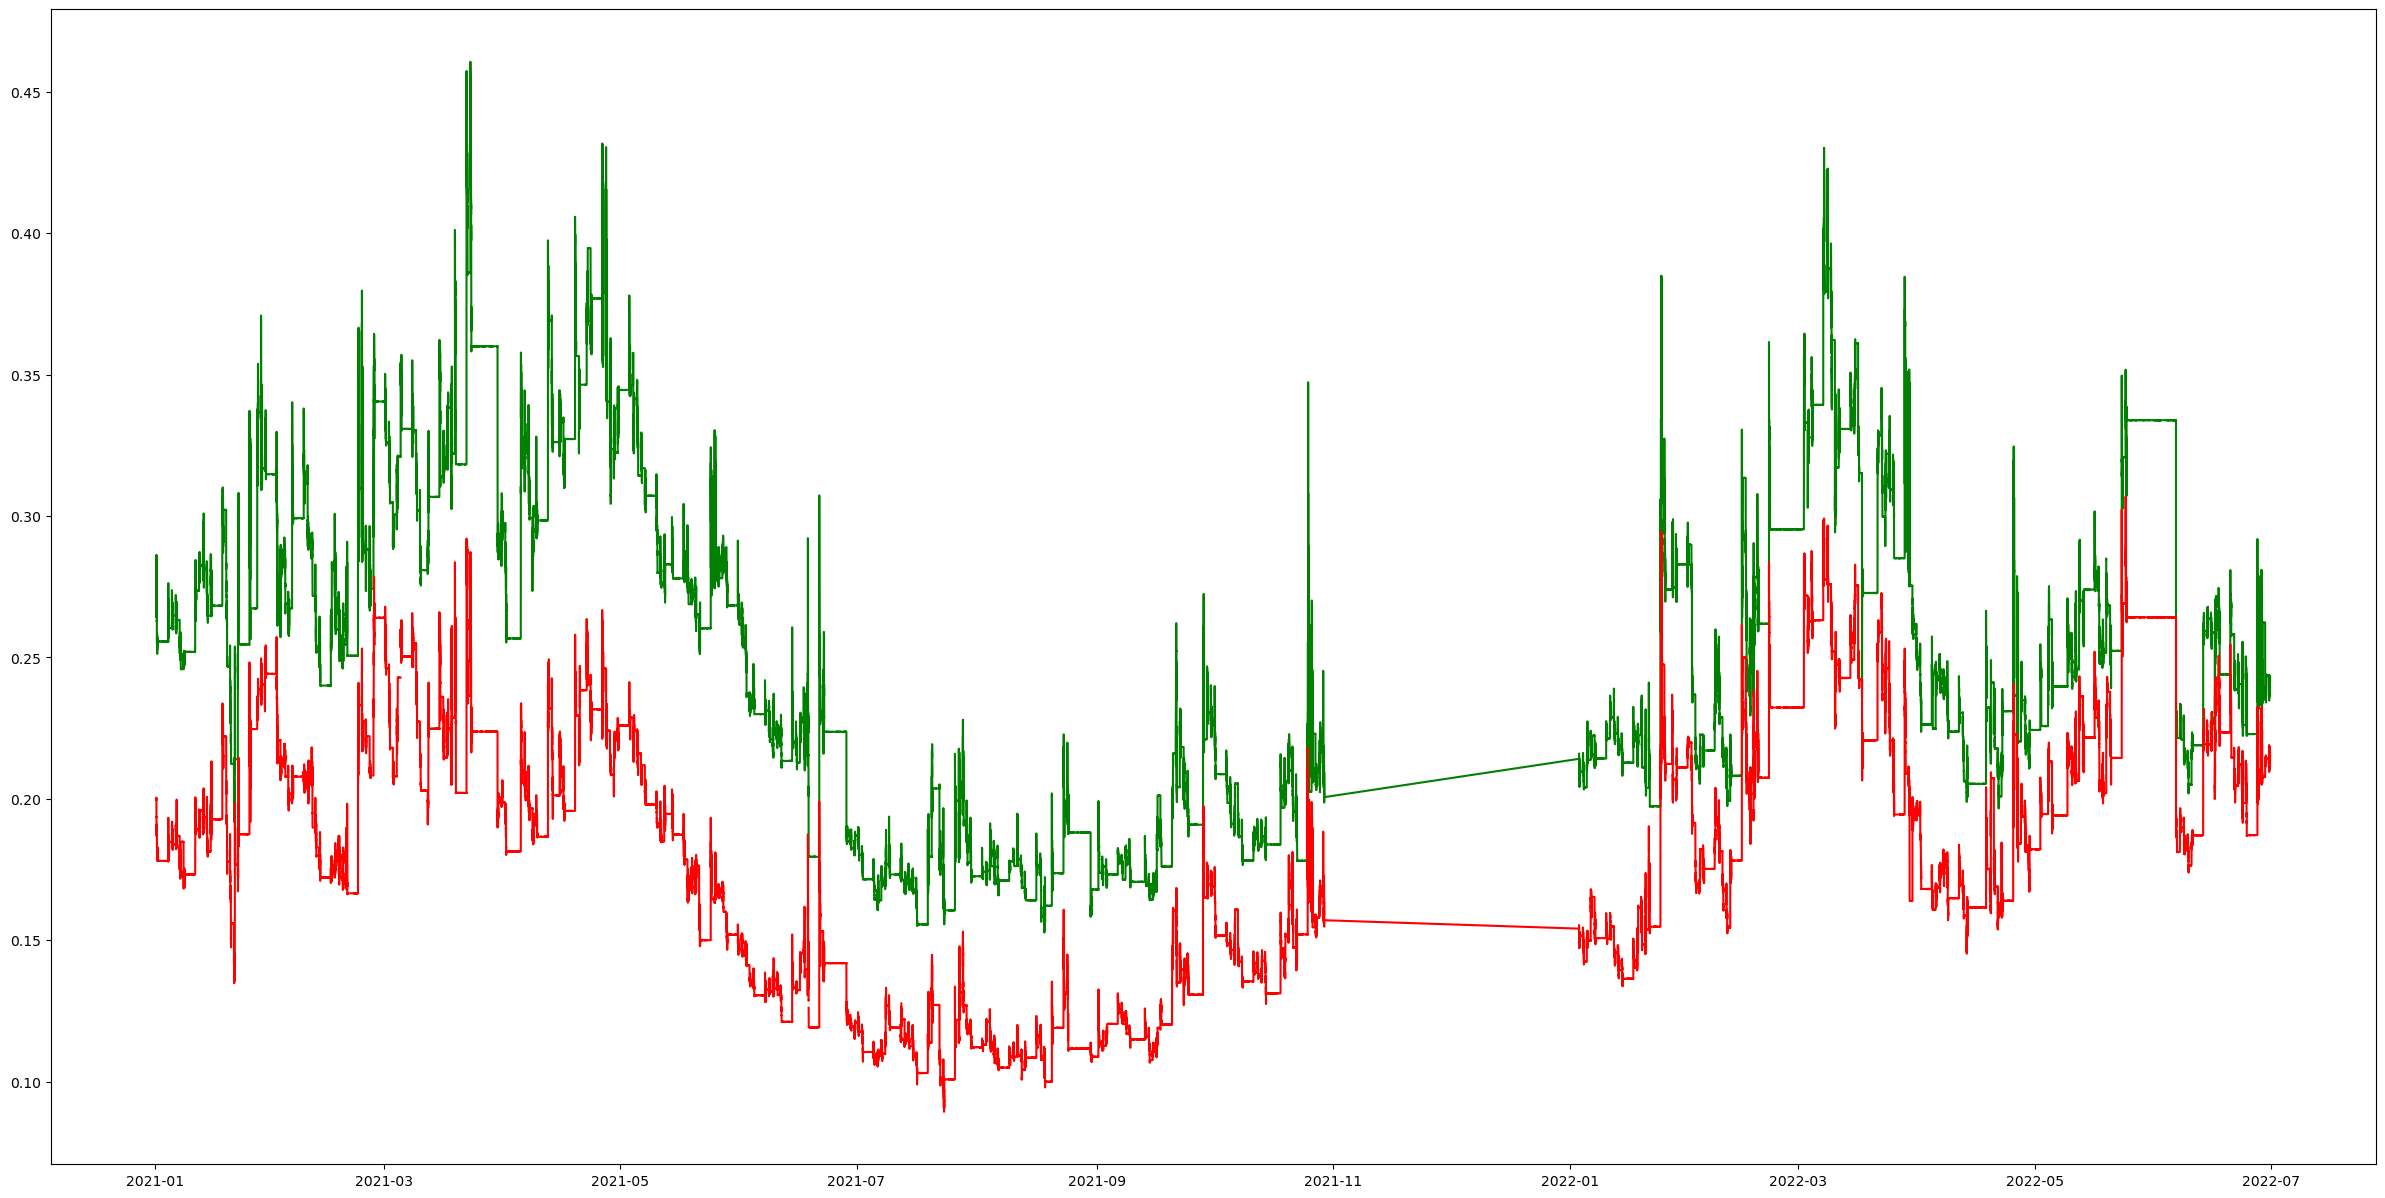

In [243]:
#Studying the trend of nifty and banknifty
plt.figure(figsize=(30,15))
plt.plot(df['banknifty'],'g',label="BankNifty")
plt.plot(df['nifty'],'r',label="Nifty")

CHECKING CORRELATION BETWEEN NIFTY AND BANKNIFTY

In [244]:
print(df['nifty'].corr(df['banknifty']))

0.8962741084918724


Since banknifty and nifty have a correlation of 0.89, filling in the missing values with random values, mean, median, mode of the values will not maintain the correlation, therefore all the missing values have been dropped.

In [245]:
base_df=df.dropna()

In [246]:
base_df.isnull().sum()

banknifty    0
nifty        0
tte          0
dtype: int64

In [247]:
#inserting empty columns to calculate spread and z-scores
base_df.insert(loc=3,column='spread',value=0)
base_df.insert(loc=4,column='z-scores',value=0)

Calculating spread by subtracting Banknifty IV and nifty IV

In [248]:
base_df.iloc[:,3]=base_df.iloc[:,0]-base_df.iloc[:,1]

In [249]:
base_df

,banknifty,nifty,tte,spread,z-scores
time,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0
...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,0
2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,0
2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,0


Calculating z-scores for spread

In [250]:
from statistics import mean, stdev

In [251]:
base_df['spread'].std()

0.026190136468635366

In [252]:
base_df['spread'].mean()

0.07080977951880095

In [253]:
base_df.iloc[:,4]=(base_df.iloc[:,3]-base_df.iloc[:,3].mean())/base_df.iloc[:,3].std()

Calculating Z-score Drawdown

In [254]:
c=base_df['z-scores'].min()
d=base_df['z-scores'].max()
drawdown=(d-c)/d
print(drawdown)

1.5666777911541574


In [255]:
base_df

,banknifty,nifty,tte,spread,z-scores
time,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.592560
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.539849
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.512377
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.589295
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.602449
...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.713117
2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.775221
2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.736867


Plotting Z-scores to identify trading regions

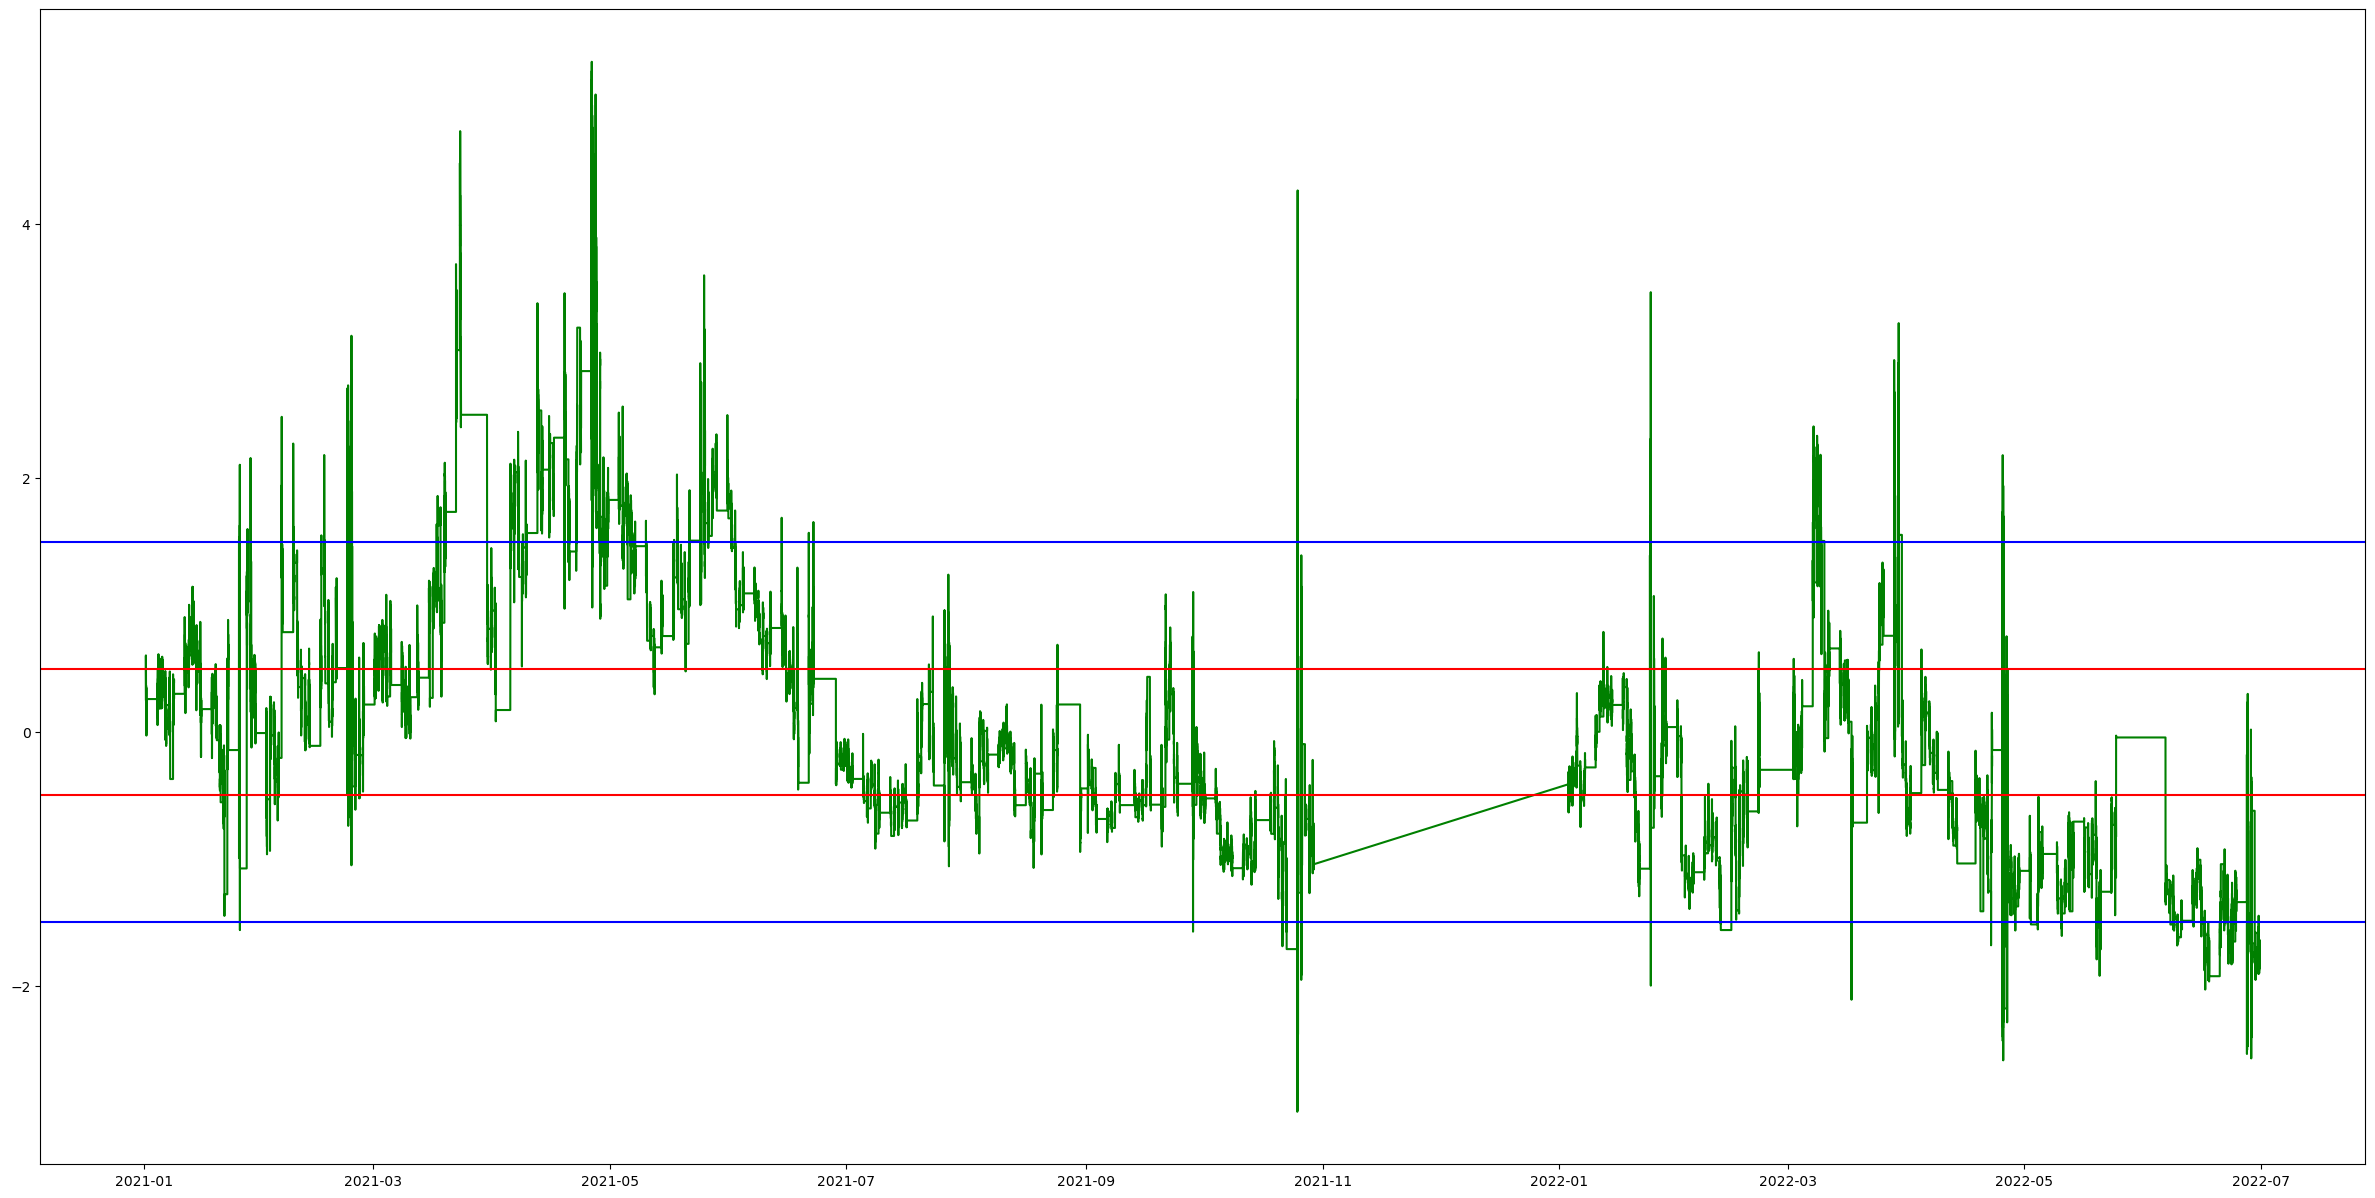

In [256]:
plt.figure(figsize=(30,15))
plt.plot(base_df['z-scores'],'g')
plt.axhline(y = 1.5, color = 'b', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.axhline(y = -1.5, color = 'b', linestyle = '-')

In [257]:
base_df.insert(loc=5,column='signal',value=0)

In [258]:
base_df

,banknifty,nifty,tte,spread,z-scores,signal
time,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.592560,0
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.539849,0
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.512377,0
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.589295,0
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.602449,0
...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.713117,0
2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.775221,0
2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.736867,0


We have data for every minute and we have to build a medium-frequency strategy that has a trading horizon ranging between 30 min to 5 days. Market is open for 375 minutes everyday, multiplying that by 5 days, gives us a total of 1875 minutes. Therefore, we can have positions ranging from 30 rows to 1875 rows in our dataframe.

Code to generate trading signals. The while loop contains conditions to determine when the trading positions should start and end. Signal = 2 denotes when we enter the trade. signal = 1 denotes when we are in the trade. Signal = 3 denotes when we exit the trade.

In [259]:
i=0
while i<len(base_df):
    #print(i)
    count=1
    if base_df.iloc[i,4]>=1.5:
        base_df.iloc[i,5]=2
        while ((i+count)<(len(base_df)-1) and base_df.iloc[i+count,4]>=0.5 and count<=1875):
            #print(count)
            base_df.iloc[i+count,5]=1
            count=count+1
        base_df.iloc[(i+count)-1,5]=3
    i=i+count

i=0
while i<len(base_df):
    #print(i)
    count=1
    if base_df.iloc[i,4]<=-1.5:
        base_df.iloc[i,5]=2
        while ((i+count)<(len(base_df)-1) and base_df.iloc[i+count,4]<=-0.5 and count<=1875):
            #print(count)
            base_df.iloc[i+count,5]=1
            count=count+1
        base_df.iloc[(i+count)-1,5]=3
    i=i+count

base_df


,banknifty,nifty,tte,spread,z-scores,signal
time,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.592560,0
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.539849,0
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.512377,0
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.589295,0
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.602449,0
...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.713117,1
2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.775221,1
2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.736867,1


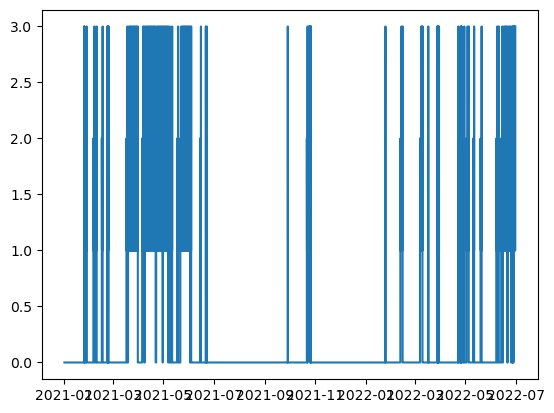

In [260]:
plt.plot(base_df['signal'])

Plotting Z-scores and signal to check when the trades are happening

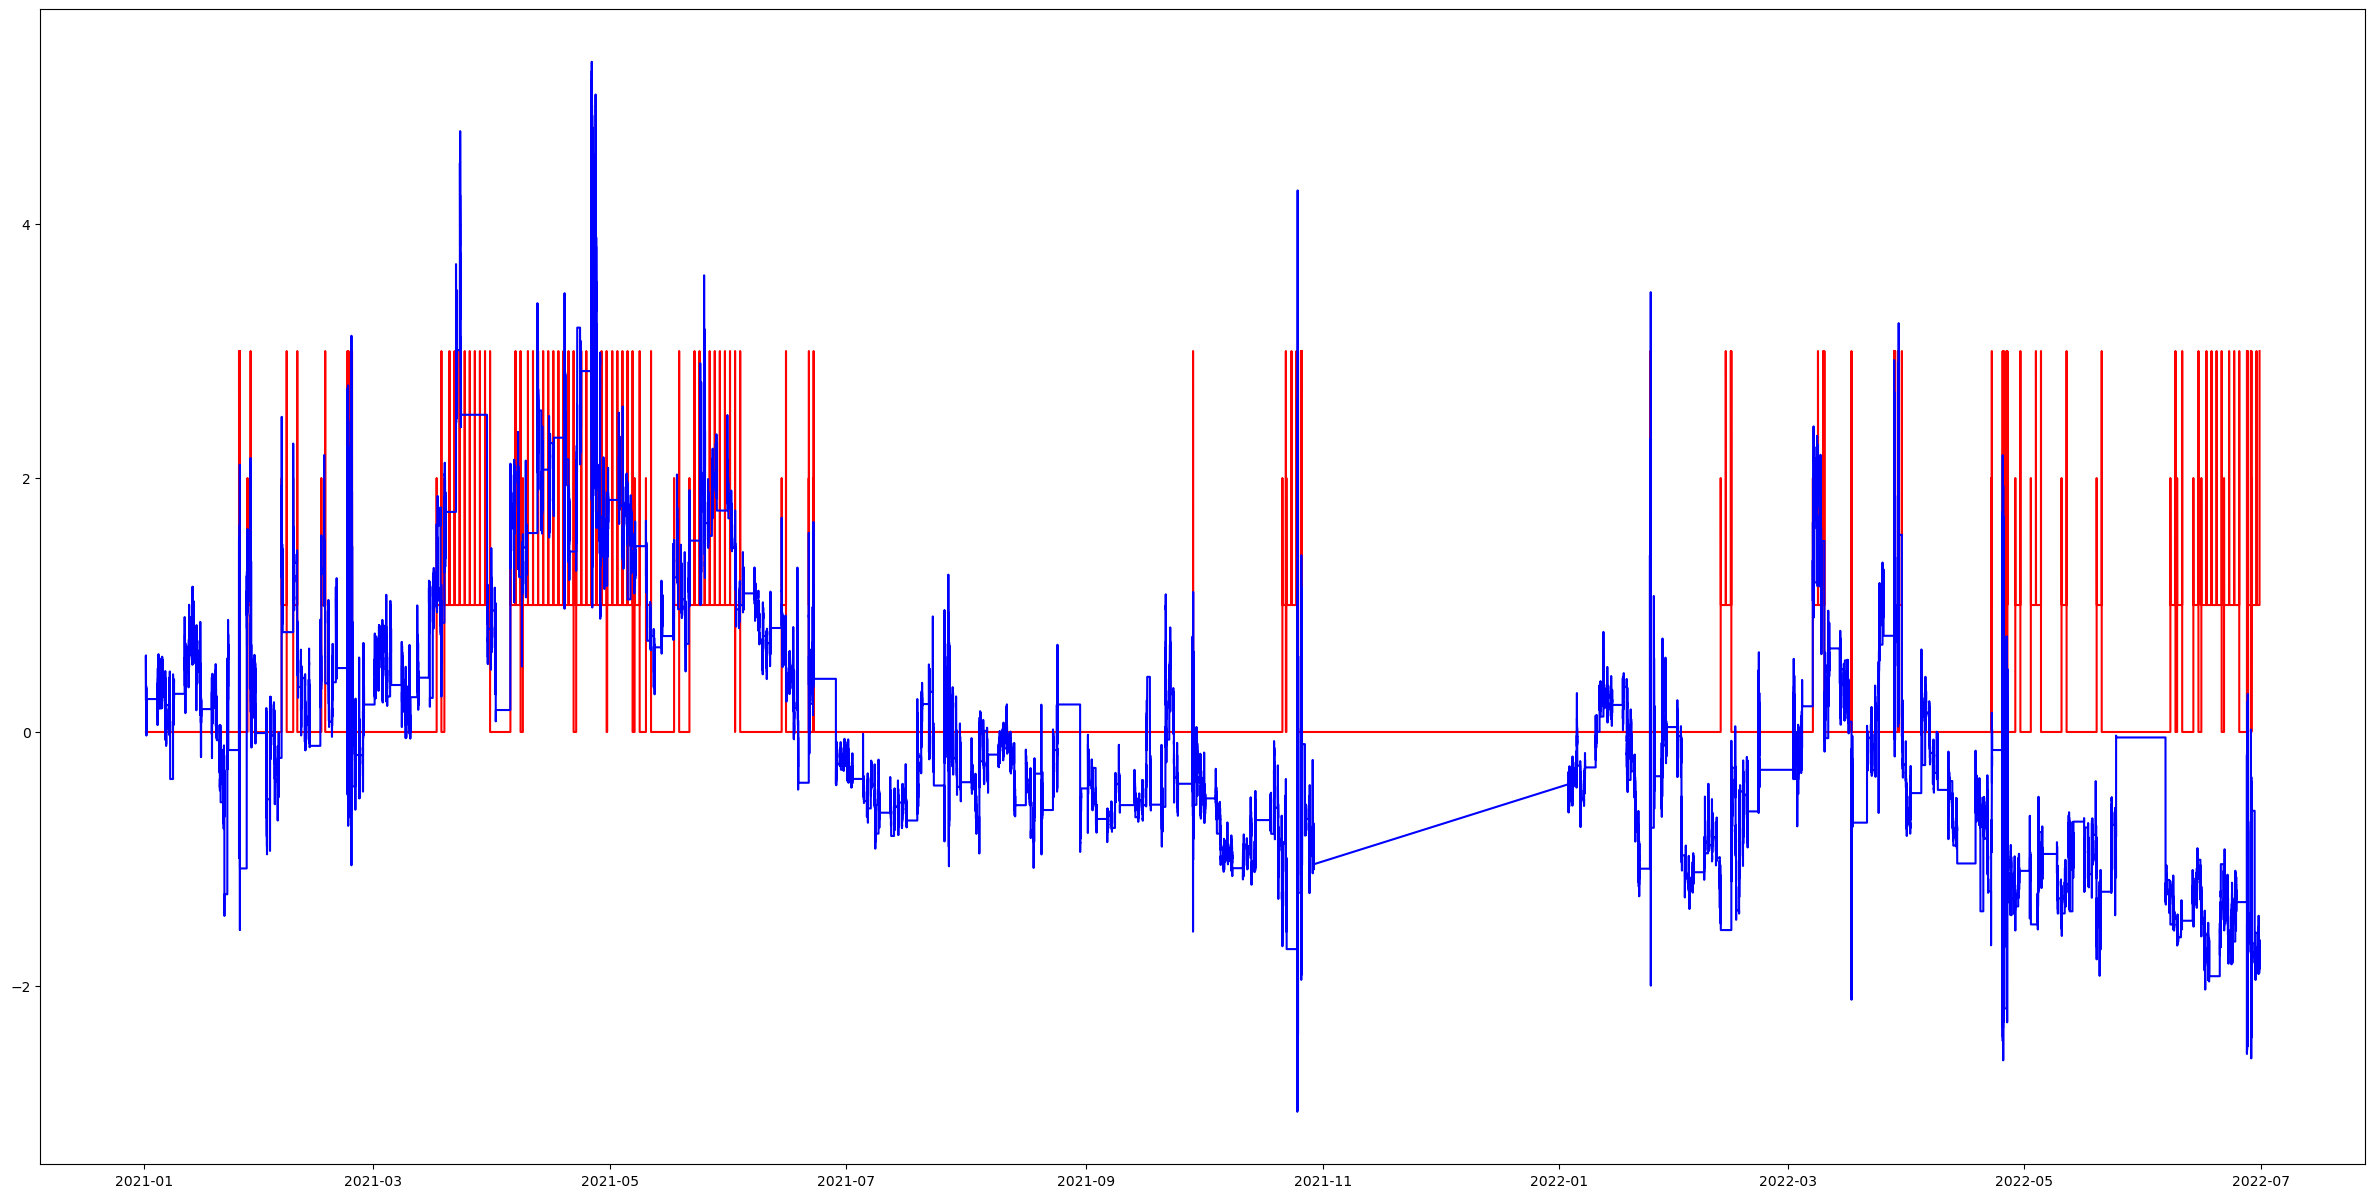

In [261]:
plt.figure(figsize=(30,15))
plt.plot(base_df['signal'],'r')
plt.plot(base_df['z-scores'],'b')

Inserting a column to calculate P/L

In [262]:
base_df.insert(loc=6,column='P/L',value=0)

Calculating P/L, when the signal is 2 it gives us the value when we entered the trade. Similarly calculating P/L when the signal is 3 gives us the value when we exit the trade.

In [263]:
base_df.loc[base_df['signal']==2,'P/L']=base_df['spread']*(base_df['tte'])**0.7
base_df.loc[base_df['signal']==3,'P/L']=base_df['spread']*(base_df['tte'])**0.7

In [264]:
base_df

,banknifty,nifty,tte,spread,z-scores,signal,P/L
time,,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.592560,0,0.000000
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.539849,0,0.000000
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.512377,0,0.000000
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.589295,0,0.000000
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.602449,0,0.000000
...,...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.713117,1,0.000000
2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.775221,1,0.000000
2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.736867,1,0.000000


Taking the net of exit value and entry value gives us how much we gained. From that we can calcuate percentage returns

In [265]:
g=base_df.loc[base_df['signal']==2,'P/L'].sum()
h=base_df.loc[base_df['signal']==3,'P/L'].sum()
return_1=(h-g)/g
print(return_1)

0.19238640136102722


Calculating Sharpe Ratio:

Formula = (Returns - Risk-free Return)/(standard deviation of returns)

The risk-free return rate considered here is 7%. (SBI fixed deposits)
We have data for 1 and half years. Compounding risk-free rate for 1 and half years.

(1+(7/100))^1.5 - 1 = 0.106 or 10.6%

In [266]:
risk_free_rate = 0.106
sharpe_ratio = (return_1 - risk_free_rate)/base_df['P/L'].std()
print(sharpe_ratio)

3.657898400649117


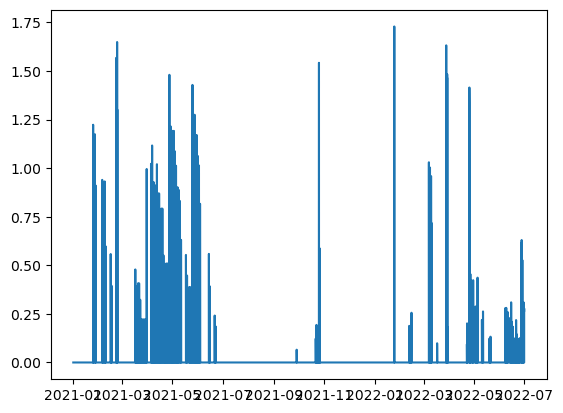

In [267]:
plt.plot(base_df['P/L'])

Approach 1:

Regression manually done. Establishing a relationship between Nifty and Banknifty. Using that relationship to predict values and then calculating spread to generate trading signals.

In [331]:
manual_reg_df=df.dropna()

In [332]:
manual_reg_df

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28
2022-06-30 15:27:00,0.240875,0.216558,28
2022-06-30 15:28:00,0.242115,0.216794,28


Studying the data distribution of nifty and banknifty

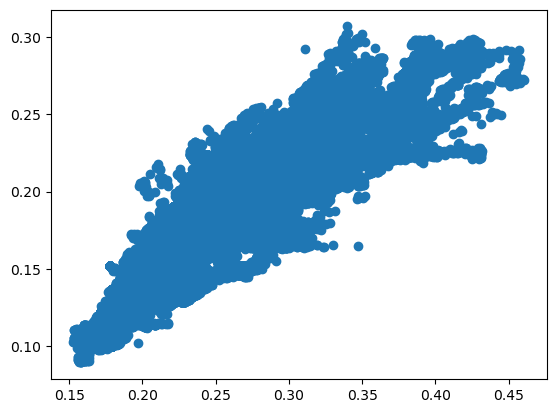

In [333]:
plt.scatter(manual_reg_df['banknifty'],manual_reg_df["nifty"])

Estimated coefficients:
b_0 = 0.04913598373237121            
b_1 = 1.1208502974550452


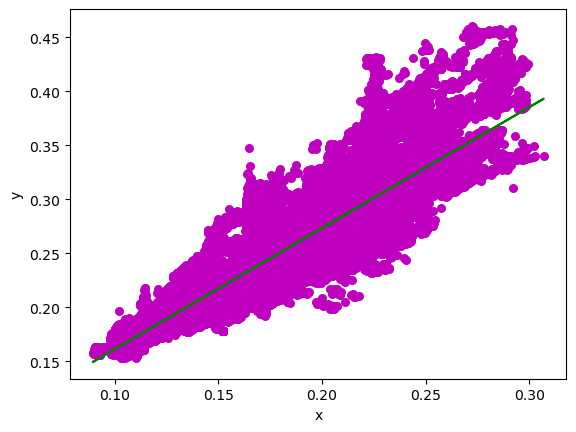

In [334]:

import numpy as np
import matplotlib.pyplot as plt
 
def estimate_coef(x, y):
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = manual_reg_df['nifty']
    y = manual_reg_df['banknifty']
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [335]:
banknifty_pred=1.1208502974550452*(	0.228649)+0.04913598373237121
print(banknifty_pred)

0.3054172833951698


BN refers to the predicted Banknifty values using regression

In [336]:
manual_reg_df.insert(loc=3,column='BN',value=0)
manual_reg_df.insert(loc=4,column='spread',value=0)
manual_reg_df.insert(loc=5,column='z-scores',value=0)

In [337]:
manual_reg_df

,banknifty,nifty,tte,BN,spread,z-scores
time,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0,0,0
2021-01-01 09:16:00,0.285381,0.200433,27,0,0,0
2021-01-01 09:17:00,0.284233,0.200004,27,0,0,0
2021-01-01 09:18:00,0.286104,0.199860,27,0,0,0
2021-01-01 09:19:00,0.285539,0.198951,27,0,0,0
...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0,0,0
2022-06-30 15:27:00,0.240875,0.216558,28,0,0,0
2022-06-30 15:28:00,0.242115,0.216794,28,0,0,0


y=x*b[0]+b[1]

In [338]:
manual_reg_df.iloc[:,3]=manual_reg_df.iloc[:,1]*1.1208502974550452 + 0.04913598373237121 

Calculating spread = banknifty - (nifty * b[0] + b[1])                      

In [339]:
manual_reg_df.iloc[:,4]=manual_reg_df.iloc[:,0]-manual_reg_df.iloc[:,3]

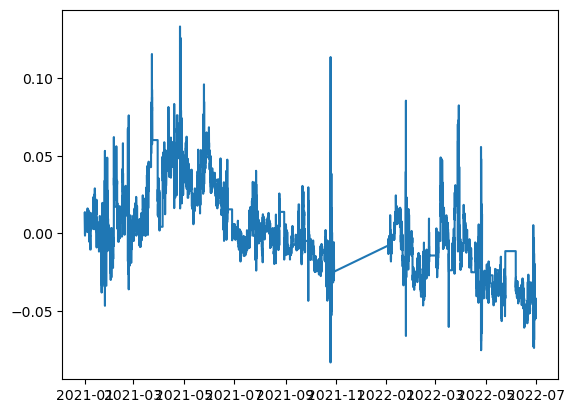

In [326]:
plt.plot(manual_reg_df['spread'])

Calculating Z-scores of the spread

In [340]:
manual_reg_df.iloc[:,5]=((manual_reg_df.iloc[:,4]-manual_reg_df.iloc[:,4].mean())/manual_reg_df.iloc[:,4].std())

Calculating Drawdown of z-score

In [341]:
c=manual_reg_df['z-scores'].min()
d=manual_reg_df['z-scores'].max()
drawdown_2=(d-c)/d
print(drawdown_2)

1.623582432594023


In [342]:
manual_reg_df

,banknifty,nifty,tte,BN,spread,z-scores
time,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.273002,0.013056,0.510194
2021-01-01 09:16:00,0.285381,0.200433,27,0.273791,0.011590,0.452924
2021-01-01 09:17:00,0.284233,0.200004,27,0.273311,0.010922,0.426831
2021-01-01 09:18:00,0.286104,0.199860,27,0.273149,0.012954,0.506234
2021-01-01 09:19:00,0.285539,0.198951,27,0.272130,0.013409,0.523989
...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.289848,-0.049147,-1.920560
2022-06-30 15:27:00,0.240875,0.216558,28,0.291866,-0.050991,-1.992623
2022-06-30 15:28:00,0.242115,0.216794,28,0.292129,-0.050015,-1.954479


Plotting Z-scores to identify patterns

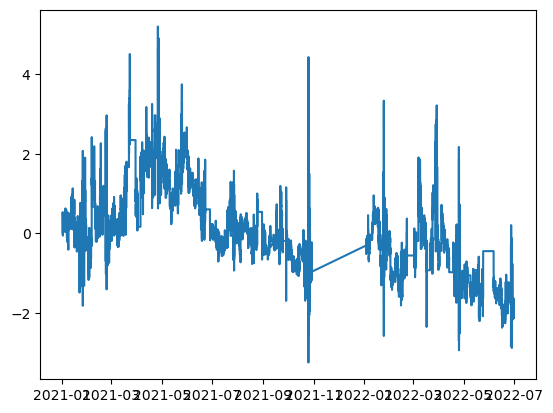

In [343]:
plt.plot(manual_reg_df['z-scores'])

In [344]:
manual_reg_df.insert(loc=6,column='signal',value=0)

Code to generate trading signals. The while loop contains conditions to determine when the trading positions should start and end. Signal = 2 denotes when we enter the trade. signal = 1 denotes when we are in the trade. Signal = 3 denotes when we exit the trade.

In [345]:
i=0
while i<len(manual_reg_df):
    #print(i)
    count=1
    if manual_reg_df.iloc[i,5]>=1.3:
        manual_reg_df.iloc[i,6]=2
        while ((i+count)<(len(manual_reg_df)-1) and manual_reg_df.iloc[i+count,5]>=0.5 and count<=1875):
            #print(count)
            manual_reg_df.iloc[i+count,6]=1
            count=count+1
        manual_reg_df.iloc[i+count-1,6]=3
    i=i+count

i=0
while i<len(manual_reg_df):
    #print(i)
    count=1
    if manual_reg_df.iloc[i,5]<=-1.3:
        manual_reg_df.iloc[i,6]=2
        while ((i+count)<(len(manual_reg_df)-1) and manual_reg_df.iloc[i+count,5]<=-0.5 and count<=1875):
            #print(count)
            manual_reg_df.iloc[i+count,6]=1
            count=count+1
        manual_reg_df.iloc[i+count-1,6]=3
    i=i+count

manual_reg_df

,banknifty,nifty,tte,BN,spread,z-scores,signal
time,,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.273002,0.013056,0.510194,0
2021-01-01 09:16:00,0.285381,0.200433,27,0.273791,0.011590,0.452924,0
2021-01-01 09:17:00,0.284233,0.200004,27,0.273311,0.010922,0.426831,0
2021-01-01 09:18:00,0.286104,0.199860,27,0.273149,0.012954,0.506234,0
2021-01-01 09:19:00,0.285539,0.198951,27,0.272130,0.013409,0.523989,0
...,...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.289848,-0.049147,-1.920560,1
2022-06-30 15:27:00,0.240875,0.216558,28,0.291866,-0.050991,-1.992623,1
2022-06-30 15:28:00,0.242115,0.216794,28,0.292129,-0.050015,-1.954479,1


In [346]:
manual_reg_df.insert(loc=7,column='P/L',value=0)

Calculating entry and exit values

In [347]:
manual_reg_df.loc[manual_reg_df['signal']==2,'P/L']=(manual_reg_df.iloc[:,0]-manual_reg_df.iloc[:,1])*(manual_reg_df['tte'])**0.7
manual_reg_df.loc[manual_reg_df['signal']==3,'P/L']=(manual_reg_df.iloc[:,0]-manual_reg_df.iloc[:,1])*(manual_reg_df['tte'])**0.7
manual_reg_df

,banknifty,nifty,tte,BN,spread,z-scores,signal,P/L
time,,,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.273002,0.013056,0.510194,0,0.000000
2021-01-01 09:16:00,0.285381,0.200433,27,0.273791,0.011590,0.452924,0,0.000000
2021-01-01 09:17:00,0.284233,0.200004,27,0.273311,0.010922,0.426831,0,0.000000
2021-01-01 09:18:00,0.286104,0.199860,27,0.273149,0.012954,0.506234,0,0.000000
2021-01-01 09:19:00,0.285539,0.198951,27,0.272130,0.013409,0.523989,0,0.000000
...,...,...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.289848,-0.049147,-1.920560,1,0.000000
2022-06-30 15:27:00,0.240875,0.216558,28,0.291866,-0.050991,-1.992623,1,0.000000
2022-06-30 15:28:00,0.242115,0.216794,28,0.292129,-0.050015,-1.954479,1,0.000000


Calculating profit percentage

In [348]:
g=manual_reg_df.loc[manual_reg_df['signal']==2,'P/L'].sum()
h=manual_reg_df.loc[manual_reg_df['signal']==3,'P/L'].sum()
return_2=(h-g)/g
print(return_2)

0.2284605069136163


Calculating Sharpe Ratio:

Formula = (Returns - Risk-free Return)/(standard deviation of returns)

The risk-free return rate considered here is 7%. (SBI fixed deposits)
We have data for 1 and half years. Compounding risk-free rate for 1 and half years.

(1+(7/100))^1.5 - 1 = 0.106 or 10.6%

In [349]:
manual_reg_df['P/L'].std()

0.0260308640115473

In [350]:
risk_free_rate = 0.106
sharpe_ratio = (return_2 - risk_free_rate)/manual_reg_df['P/L'].std()
print(sharpe_ratio)

4.704434968401079


Studying the z-score patterns

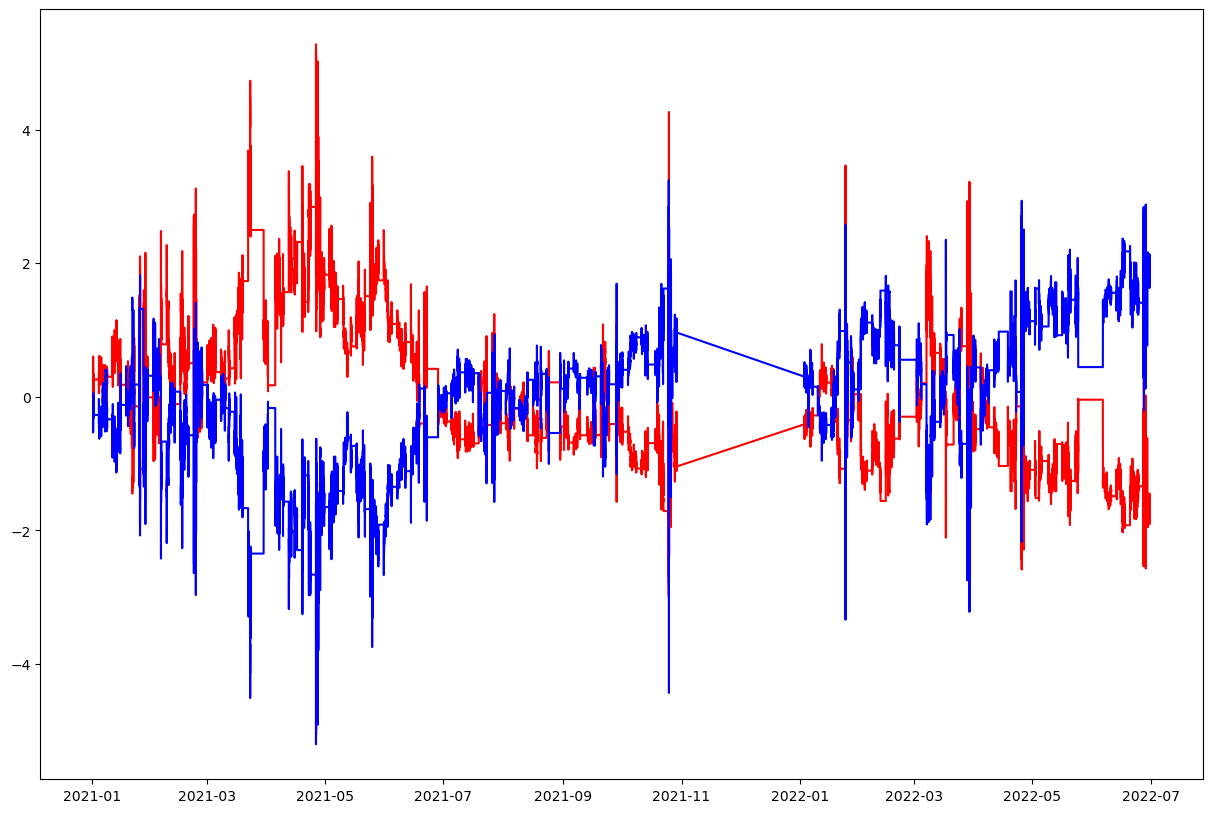

In [289]:
plt.figure(figsize=(15,10))
plt.plot(base_df['z-scores'],'r')
plt.plot(manual_reg_df['z-scores'],'b')

Approach 2:

Regression using OLS method. This type of regression uses ordinary least squares to optimise the errors.

In [290]:
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split

In [291]:
ols_reg_df=df.dropna()

Training the model 

In [292]:
a=ols_reg_df.iloc[:,1]
b=ols_reg_df.iloc[:,0]
type(a)

pandas.core.series.Series

Preparing the data for model training

In [293]:
a=a.to_numpy()
b=b.to_numpy()
print(type(b))

<class 'numpy.ndarray'>


In [294]:
a=a.reshape(-1,1)
b=b.reshape(-1,1)

In [295]:
model=OLS

In [296]:
import statsmodels.api as sm

In [297]:
model=sm.OLS(a, b).fit()

In [298]:
hedge_ratio=model.params[0]

In [299]:
hedge_ratio

0.7169230312842605

BN refers to the predicted values of Bank Nifty

In [300]:
ols_reg_df.insert(loc=3,column='BN',value=0)

BN = hedge_ratio * Nifty

In [301]:
ols_reg_df.iloc[:,3]=ols_reg_df.iloc[:,1]*hedge_ratio

creating columns to calculate z-scores, signal and P/L

In [302]:
ols_reg_df.insert(loc=4,column='spread',value=0)
ols_reg_df.insert(loc=5,column='z-scores',value=0)
ols_reg_df.insert(loc=6,column='signal',value=0)
ols_reg_df.insert(loc=7,column='P/L',value=0)

Calculating spread = Banknifty - hedge_ratio * nifty

In [303]:
ols_reg_df.iloc[:,4]=ols_reg_df.iloc[:,0]-ols_reg_df.iloc[:,3]

Calculating z-score

In [304]:
ols_reg_df.iloc[:,5]=((ols_reg_df.iloc[:,4]-ols_reg_df.iloc[:,4].mean())/ols_reg_df.iloc[:,4].std())

Calculating z-score drawdown

In [305]:
drawdown_3 = (ols_reg_df['z-scores'].max()-ols_reg_df['z-scores'].min())/ols_reg_df['z-scores'].max()
print(drawdown_3)

1.4697806669568656


Code to generate trading signals. The while loop contains conditions to determine when the trading positions should start and end. Signal = 2 denotes when we enter the trade. signal = 1 denotes when we are in the trade. Signal = 3 denotes when we exit the trade.

In [306]:
i=0
while i<len(ols_reg_df):
    #print(i)
    count=1
    if ols_reg_df.iloc[i,5]>=1.25:
        ols_reg_df.iloc[i,6]=2
        while ((i+count)<(len(ols_reg_df)-1) and ols_reg_df.iloc[i+count,5]>=0.5 and count<=1875):
            #print(count)
            ols_reg_df.iloc[i+count,6]=1
            count=count+1
        ols_reg_df.iloc[i+count-1,6]=3
    i=i+count

i=0
while i<len(ols_reg_df):
    #print(i)
    count=1
    if ols_reg_df.iloc[i,5]<=-1.25:
        ols_reg_df.iloc[i,6]=2
        while ((i+count)<(len(ols_reg_df)-1) and ols_reg_df.iloc[i+count,5]<=-0.5 and count<=1875):
            #print(count)
            ols_reg_df.iloc[i+count,6]=1
            count=count+1
        ols_reg_df.iloc[i+count-1,6]=3
    i=i+count

ols_reg_df

,banknifty,nifty,tte,BN,spread,z-scores,signal,P/L
time,,,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.143190,0.142868,0.672514,0,0
2021-01-01 09:16:00,0.285381,0.200433,27,0.143695,0.141686,0.635197,0,0
2021-01-01 09:17:00,0.284233,0.200004,27,0.143387,0.140846,0.608637,0,0
2021-01-01 09:18:00,0.286104,0.199860,27,0.143284,0.142819,0.670985,0,0
2021-01-01 09:19:00,0.285539,0.198951,27,0.142633,0.142906,0.673739,0,0
...,...,...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.153965,0.086736,-1.100612,1,0
2022-06-30 15:27:00,0.240875,0.216558,28,0.155256,0.085619,-1.135891,1,0
2022-06-30 15:28:00,0.242115,0.216794,28,0.155424,0.086690,-1.102059,1,0


Calculating values at entry and exit levels

In [307]:
ols_reg_df.loc[ols_reg_df['signal']==2,'P/L']=abs(ols_reg_df.iloc[:,0]-ols_reg_df.iloc[:,1])*(ols_reg_df['tte'])**0.7
ols_reg_df.loc[ols_reg_df['signal']==3,'P/L']=abs(ols_reg_df.iloc[:,0]-ols_reg_df.iloc[:,1])*(ols_reg_df['tte'])**0.7

Calculating return percentages

In [308]:
g=ols_reg_df.loc[ols_reg_df['signal']==2,'P/L'].sum()
h=ols_reg_df.loc[ols_reg_df['signal']==3,'P/L'].sum()
returns_3=(h-g)/g
print(returns_3)

0.2212460798990835


Calculating Sharpe Ratio:

Formula = (Returns - Risk-free Return)/(standard deviation of returns)

The risk-free return rate considered here is 7%. (SBI fixed deposits)
We have data for 1 and half years. Compounding risk-free rate for 1 and half years.

(1+(7/100))^1.5 - 1 = 0.106 or 10.6%

In [309]:
risk_free_rate = 0.106
sharpe_ratio = (returns_3 - risk_free_rate)/ols_reg_df['P/L'].std()
print(sharpe_ratio)

5.093489144991646


Approach 3: pairs trading using Ratios

Calculating the ratios by dividing the two series. 
(Banknifty/nifty)

In [310]:
ratio_df=df.dropna()

Creating a column to calculate the ratio

In [311]:
ratio_df.insert(loc=3,column='ratio',value=0)

In [312]:
ratio_df.iloc[:,3]=ratio_df.iloc[:,0]/ratio_df.iloc[:,1]
ratio_df

,banknifty,nifty,tte,ratio
time,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,1.432231
2021-01-01 09:16:00,0.285381,0.200433,27,1.423826
2021-01-01 09:17:00,0.284233,0.200004,27,1.421137
2021-01-01 09:18:00,0.286104,0.199860,27,1.431520
2021-01-01 09:19:00,0.285539,0.198951,27,1.435223
...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,1.120801
2022-06-30 15:27:00,0.240875,0.216558,28,1.112286
2022-06-30 15:28:00,0.242115,0.216794,28,1.116798


Oberserving the trend

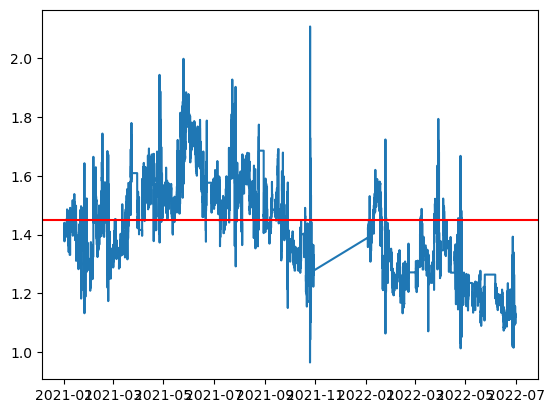

In [313]:
plt.plot(ratio_df['ratio'])
plt.axhline(y = 1.45, color = 'r', linestyle = '-')

Creating columns for calculating spread, z-score, signal and P/L

In [314]:
ratio_df.insert(loc=4,column='spread',value=0)
ratio_df.insert(loc=5,column='z-scores',value=0)
ratio_df.insert(loc=6,column='signal',value=0)
ratio_df.insert(loc=7,column='P/L',value=0)

In [315]:
ratio_df

,banknifty,nifty,tte,ratio,spread,z-scores,signal,P/L
time,,,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,1.432231,0,0,0,0
2021-01-01 09:16:00,0.285381,0.200433,27,1.423826,0,0,0,0
2021-01-01 09:17:00,0.284233,0.200004,27,1.421137,0,0,0,0
2021-01-01 09:18:00,0.286104,0.199860,27,1.431520,0,0,0,0
2021-01-01 09:19:00,0.285539,0.198951,27,1.435223,0,0,0,0
...,...,...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,1.120801,0,0,0,0
2022-06-30 15:27:00,0.240875,0.216558,28,1.112286,0,0,0,0
2022-06-30 15:28:00,0.242115,0.216794,28,1.116798,0,0,0,0


Calculating spread

In [316]:
ratio_df.iloc[:,4]=ratio_df.iloc[:,0]-ratio_df.iloc[:,1]

Calculating Z-scores for the ratios

In [317]:
ratio_df.iloc[:,5]=((ratio_df.iloc[:,3]-ratio_df.iloc[:,3].mean())/ratio_df.iloc[:,3].std())

Calculating Drawdown

In [318]:
drawdown_4=(ratio_df['z-scores'].max()-ratio_df['z-scores'].min())/ratio_df['z-scores'].max()
print(drawdown_4)

1.6508518403919528


Code to generate trading signals. The while loop contains conditions to determine when the trading positions should start and end. Signal = 2 denotes when we enter the trade. signal = 1 denotes when we are in the trade. Signal = 3 denotes when we exit the trade.

In [319]:
i=0
while i<len(ratio_df):
    #print(i)
    count=1
    if ratio_df.iloc[i,5]>=1.375:
        ratio_df.iloc[i,6]=2
        while ((i+count)<(len(ratio_df)-1) and ratio_df.iloc[i+count,5]>=0.5 and count<=1875):
            #print(count)
            ratio_df.iloc[i+count,6]=1
            count=count+1
        ratio_df.iloc[i+count-1,6]=3
    i=i+count

i=0
while i<len(ratio_df):
    #print(i)
    count=1
    if ratio_df.iloc[i,5]<=-1.375:
        ratio_df.iloc[i,6]=2
        while ((i+count)<(len(ratio_df)-1) and ratio_df.iloc[i+count,5]<=-0.5 and count<=1875):
            #print(count)
            ratio_df.iloc[i+count,6]=1
            count=count+1
        ratio_df.iloc[i+count-1,6]=3
    i=i+count

ratio_df

,banknifty,nifty,tte,ratio,spread,z-scores,signal,P/L
time,,,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,1.432231,0.086329,0.105827,0,0
2021-01-01 09:16:00,0.285381,0.200433,27,1.423826,0.084948,0.053117,0,0
2021-01-01 09:17:00,0.284233,0.200004,27,1.421137,0.084229,0.036250,0,0
2021-01-01 09:18:00,0.286104,0.199860,27,1.431520,0.086244,0.101367,0,0
2021-01-01 09:19:00,0.285539,0.198951,27,1.435223,0.086588,0.124592,0,0
...,...,...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,1.120801,0.025943,-1.847326,1,0
2022-06-30 15:27:00,0.240875,0.216558,28,1.112286,0.024317,-1.900728,1,0
2022-06-30 15:28:00,0.242115,0.216794,28,1.116798,0.025321,-1.872433,1,0


Calculating values at entry and exit levels

In [320]:
ratio_df.loc[ratio_df['signal']==2,'P/L']=(ratio_df.iloc[:,0]-ratio_df.iloc[:,1])*(ratio_df['tte'])**0.7
ratio_df.loc[ratio_df['signal']==3,'P/L']=(ratio_df.iloc[:,0]-ratio_df.iloc[:,1])*(ratio_df['tte'])**0.7

calculating return percentage

In [321]:
g=ratio_df.loc[ratio_df['signal']==2,'P/L'].sum()
h=ratio_df.loc[ratio_df['signal']==3,'P/L'].sum()
returns=(h-g)/g
print(returns)

0.17639336183070703


Calculating Sharpe Ratio:

Formula = (Returns - Risk-free Return)/(standard deviation of returns)

The risk-free return rate considered here is 7%. (SBI fixed deposits)
We have data for 1 and half years. Compounding risk-free rate for 1 and half years.

(1+(7/100))^1.5 - 1 = 0.106 or 10.6%

In [322]:
risk_free_rate = 0.106
sharpe_ratio = (returns - risk_free_rate)/ratio_df['P/L'].std()
print(sharpe_ratio)

4.216651737048747


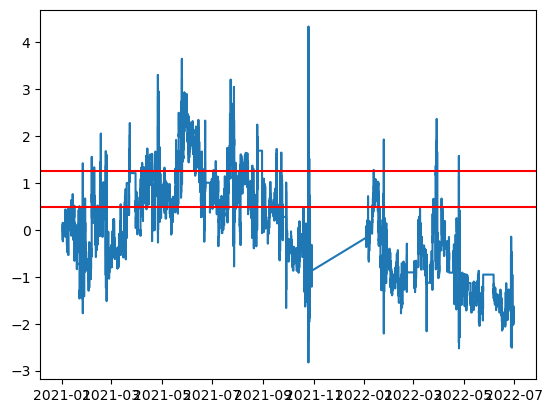

In [324]:
plt.plot(ratio_df['z-scores'])
plt.axhline(y = 1.25, color = 'r', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')